In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

# Connect to Comprehend to get Sentiment
import boto3

In [2]:
!aws s3 cp s3://amazon-reviews-pds/tsv/amazon_reviews_us_Video_Games_v1_00.tsv.gz .

download: s3://amazon-reviews-pds/tsv/amazon_reviews_us_Video_Games_v1_00.tsv.gz to ./amazon_reviews_us_Video_Games_v1_00.tsv.gz


In [3]:
df = pd.read_csv('amazon_reviews_us_Video_Games_v1_00.tsv.gz',
                 sep='\t',error_bad_lines=False,warn_bad_lines=True)

b'Skipping line 20630: expected 15 fields, saw 22\nSkipping line 28172: expected 15 fields, saw 22\nSkipping line 54791: expected 15 fields, saw 22\n'
b'Skipping line 75419: expected 15 fields, saw 22\nSkipping line 104832: expected 15 fields, saw 22\n'
b'Skipping line 138464: expected 15 fields, saw 22\nSkipping line 194849: expected 15 fields, saw 22\n'
b'Skipping line 201568: expected 15 fields, saw 22\nSkipping line 242567: expected 15 fields, saw 22\n'
b'Skipping line 493585: expected 15 fields, saw 22\nSkipping line 502478: expected 15 fields, saw 22\n'
b'Skipping line 660750: expected 15 fields, saw 22\n'


In [4]:
print('Rows: {0}, Columns: {1}'.format(df.shape[0],df.shape[1]))

Rows: 1780268, Columns: 15


In [5]:
df.index.max()

1780267

In [6]:
df.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date'],
      dtype='object')

In [7]:
df.isna().any(axis=0)

marketplace          False
customer_id          False
review_id            False
product_id           False
product_parent       False
product_title        False
product_category     False
star_rating          False
helpful_votes        False
total_votes          False
vine                 False
verified_purchase    False
review_headline       True
review_body           True
review_date           True
dtype: bool

In [8]:
# Look for any rows that have NA
rows_missing_values = df.isna().any(axis=1)

In [9]:
df[rows_missing_values]

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
5445,US,2484263,R2B35BVS3N1UZA,B00WQDYBMW,384073224,YTTL Hydro-Dipped Woodgrain Custom Controller ...,Video Games,5,5,5,N,Y,Five Stars,NaN,2015-08-27
6826,US,589826,R2J9PXSGXYZCMD,B00N4ABODK,375499210,Nintendo Amiibo,Video Games,5,0,0,N,Y,Five Stars,NaN,2015-08-25
29521,US,17815409,R1L5NXR69H4HKE,B00YZEGVH8,346341778,Nulink&#153; AC Power Support Adapter Unit Rep...,Video Games,1,2,2,N,Y,AVOID THIS COMPANY,NaN,2015-08-05
30095,US,18533538,R2S1NGVALMQINL,B00KSN7OGC,340786702,The Witcher: Wild Hunt - Collector's Edition -...,Video Games,1,5,9,N,Y,One Star,NaN,2015-08-05
33714,US,199175,RJTJA8KVTCTZP,B004EW2PC6,457503156,Pokémon - Black Version,Video Games,5,0,1,N,Y,Five Stars,NaN,2015-08-01
34710,US,198400,RJ6H77NUWQHOP,B00FM5IY38,478176803,Ryse: Son of Rome,Video Games,5,0,2,N,Y,Five Stars,NaN,2015-07-31
34784,US,48136609,RR25FYD61XHOW,B00EFRN2IQ,793022980,Sims 4,Video Games,5,1,5,N,Y,Five Stars,NaN,2015-07-31
34941,US,48136609,R3ZVZKUZF55II,B00DHF39L2,164244692,Wolfenstein: The New Order,Video Games,5,0,3,N,Y,Five Stars,NaN,2015-07-31
35365,US,48136609,RWBY12CA0S3IQ,B00KF7BE7G,933463177,Metro Redux - Xbox One,Video Games,5,0,0,N,Y,Five Stars,NaN,2015-07-31
35447,US,48136609,RDOD3VD8MHXLJ,B00FM5IY38,478176803,Ryse: Son of Rome,Video Games,5,0,2,N,Y,Five Stars,NaN,2015-07-31


In [10]:
df['review_headline'] = df['review_headline'].fillna(' ')
df['review_body'] = df['review_body'].fillna(' ')

In [11]:
# Replace embedded new lines, tabs and carriage return
pattern = r'[\n\t\r]+'

In [12]:
# Use Regex module sub method to identify patterns of interest and replace the matching text.
text = 'ab,cd\n\tef'

print('original text:', text)

print('after substituition:', re.sub(pattern,' ', text))

original text: ab,cd
	ef
after substituition: ab,cd ef


In [13]:
df['product_title'] = df['product_title'].map(lambda x: re.sub(pattern,' ',x))
df['review_headline'] = df['review_headline'].map(lambda x: re.sub(pattern,' ',x))
df['review_body'] = df['review_body'].map(lambda x: re.sub(pattern,' ',x))

In [14]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,12039526,RTIS3L2M1F5SM,B001CXYMFS,737716809,Thrustmaster T-Flight Hotas X Flight Stick,Video Games,5,0,0,N,Y,an amazing joystick. I especially love that yo...,"Used this for Elite Dangerous on my mac, an am...",2015-08-31
1,US,9636577,R1ZV7R40OLHKD,B00M920ND6,569686175,Tonsee 6 buttons Wireless Optical Silent Gamin...,Video Games,5,0,0,N,Y,Definitely a silent mouse... Not a single clic...,"Loved it, I didn't even realise it was a gami...",2015-08-31
2,US,2331478,R3BH071QLH8QMC,B0029CSOD2,98937668,Hidden Mysteries: Titanic Secrets of the Fatef...,Video Games,1,0,1,N,Y,One Star,poor quality work and not as it is advertised.,2015-08-31
3,US,52495923,R127K9NTSXA2YH,B00GOOSV98,23143350,GelTabz Performance Thumb Grips - PlayStation ...,Video Games,3,0,0,N,Y,"good, but could be bettee","nice, but tend to slip away from stick in inte...",2015-08-31
4,US,14533949,R32ZWUXDJPW27Q,B00Y074JOM,821342511,Zero Suit Samus amiibo - Japan Import (Super S...,Video Games,4,0,0,N,Y,Great but flawed.,"Great amiibo, great for collecting. Quality ma...",2015-08-31


In [15]:
df['review_body'].head()

0    Used this for Elite Dangerous on my mac, an am...
1    Loved it,  I didn't even realise it was a gami...
2       poor quality work and not as it is advertised.
3    nice, but tend to slip away from stick in inte...
4    Great amiibo, great for collecting. Quality ma...
Name: review_body, dtype: object

In [16]:
# Some examples of review title and body
for i in range(10):
    print(df.iloc[i]['review_headline'] + ' - ' + df.iloc[i]['review_body'])
    print()

an amazing joystick. I especially love that you can twist ... - Used this for Elite Dangerous on my mac, an amazing joystick. I especially love that you can twist the stick for different movement bindings as well as move it in the normal way.

Definitely a silent mouse... Not a single click was heard - Loved it,  I didn't even realise it was a gaming mouse,  I typed in &#34;silent mouse&#34; and selected this one. It is perfect and looks pretty cool as well. Now my boyfriend's gaming is wonderfully comfortably silent :) . Think I might just get one for myself.

One Star - poor quality work and not as it is advertised.

good, but could be bettee - nice, but tend to slip away from stick in intense (hard pressed) gaming sessions.

Great but flawed. - Great amiibo, great for collecting. Quality material to be desired, since its not perfect.

One Star - The remote constantly have to be adjusted in order to charge.

A Must - I have a 2012-2013 XL and this is very durable, comfortable, and re

In [17]:
session = boto3.Session(region_name='us-east-1')

In [18]:
client = session.client('comprehend')

In [19]:
# Try some examples
sentiment = client.detect_sentiment(
    Text="Works awesome for apt size 110 dryer - Works awesome for apt size 110 dryer. Handles load from apt size washer just fine. It does take longer to dry. Electric cost savings over a full size 220 is worth the time. Does not add much humidity unless lint filter is full.",
    LanguageCode='en'
)

In [20]:
sentiment['Sentiment'],sentiment['SentimentScore']

('POSITIVE',
 {'Positive': 0.9983564019203186,
  'Negative': 3.536563235684298e-05,
  'Neutral': 0.0015746206045150757,
  'Mixed': 3.36409175361041e-05})

In [21]:
# Try some examples
sentiment = client.detect_sentiment(
    Text="用了两天就坏了，联系客服，给我答案用了两天，最后说换货，这么大的店，早干嘛呢！办事效率太低。",
    LanguageCode='zh'
)
sentiment['Sentiment'],sentiment['SentimentScore']

('NEGATIVE',
 {'Positive': 8.562108996557072e-05,
  'Negative': 0.9998108744621277,
  'Neutral': 0.00010249427577946335,
  'Mixed': 1.0376279533375055e-06})

In [22]:
df.shape

(1780268, 15)

In [92]:
df_first_10000 = df.iloc[0:10000,]

In [67]:
df_first_10000.shape

(10000, 15)

In [82]:
results2 = []

In [83]:
# Get sentiment for all reviews (25 reviews at a time) 
step = 25 
results = [] 
for i in range(0,df_first_10000.shape[0],step): 
    print('***',i,i+step) 
    review = list((df_first_10000.iloc[i:i+step]['review_headline'] + ' - ' + df_first_10000.iloc[i:i+step]['review_body'].str.slice(0,4000)).values) 
    # initialize place holder for return values 
    temp_results = ['']*len(review) 
    sentiment = client.batch_detect_sentiment(TextList=review,LanguageCode='en') 
    # Get the sentiment 
    for s in sentiment['ResultList']: 
        print(s['Index']+i,s['Sentiment']) 
        temp_results[s['Index']] = s['Sentiment'] 
        results.extend(temp_results)
        results2.append(temp_results)

*** 0 25
0 POSITIVE
1 POSITIVE
2 NEGATIVE
3 MIXED
4 MIXED
5 NEGATIVE
6 POSITIVE
7 POSITIVE
8 POSITIVE
9 POSITIVE
10 POSITIVE
11 NEGATIVE
12 NEGATIVE
13 POSITIVE
14 NEGATIVE
15 POSITIVE
16 POSITIVE
17 POSITIVE
18 POSITIVE
19 POSITIVE
20 NEGATIVE
21 POSITIVE
22 POSITIVE
23 POSITIVE
24 POSITIVE
*** 25 50
25 POSITIVE
26 NEGATIVE
27 POSITIVE
28 POSITIVE
29 POSITIVE
30 POSITIVE
31 POSITIVE
32 POSITIVE
33 POSITIVE
34 POSITIVE
35 POSITIVE
36 NEGATIVE
37 MIXED
38 POSITIVE
39 POSITIVE
40 POSITIVE
41 NEGATIVE
42 POSITIVE
43 NEGATIVE
44 POSITIVE
45 POSITIVE
46 POSITIVE
47 POSITIVE
48 POSITIVE
49 POSITIVE
*** 50 75
50 POSITIVE
51 POSITIVE
52 POSITIVE
53 MIXED
54 POSITIVE
55 NEUTRAL
56 POSITIVE
57 POSITIVE
58 POSITIVE
59 POSITIVE
60 POSITIVE
61 POSITIVE
62 POSITIVE
63 MIXED
64 POSITIVE
65 POSITIVE
66 POSITIVE
67 NEGATIVE
68 NEGATIVE
69 POSITIVE
70 NEGATIVE
71 MIXED
72 POSITIVE
73 POSITIVE
74 NEGATIVE
*** 75 100
75 POSITIVE
76 POSITIVE
77 POSITIVE
78 POSITIVE
79 POSITIVE
80 NEGATIVE
81 NEGATIVE
82 PO

In [91]:
results2
len(results2)

10000

In [75]:
df_first_10000.shape[0]

10000

In [ ]:
results = pd.read_csv('Results.csv',header=None)

In [96]:
results2
flattened = [val for sublist in results2 for val in sublist]
flattened

['POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'MIXED',
 'MIXED',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'MIXED',
 'MIXED',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'MIXED',
 'MIXED',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'NEGATIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'POSITIVE',
 'NEGATIVE',
 'MI

In [145]:
# Add Sentiments to the data frame
df_first_10000 = df.iloc[0:10000,]
df_first_10000['sentiment']=flattened[0:10000]

#Removing NAs from our sentiment analysis, which proved to be not necessary
#df_first_10000 = df_first_25000[df_first_25000.sentiment!=""]

df_first_10000.shape
#For our second category, we will be directly using the dataset instead of exporting then importing it
#df_first_10000.to_csv('customer_reviews_with_sentiment_compressed.txt.gz',index=False,header=True,compression='gzip',sep='\t')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


(10000, 16)

End of Import

In [146]:
df_first_10000.head(100)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,12039526,RTIS3L2M1F5SM,B001CXYMFS,737716809,Thrustmaster T-Flight Hotas X Flight Stick,Video Games,5,0,0,N,Y,an amazing joystick. I especially love that yo...,"Used this for Elite Dangerous on my mac, an am...",2015-08-31,POSITIVE
1,US,9636577,R1ZV7R40OLHKD,B00M920ND6,569686175,Tonsee 6 buttons Wireless Optical Silent Gamin...,Video Games,5,0,0,N,Y,Definitely a silent mouse... Not a single clic...,"Loved it, I didn't even realise it was a gami...",2015-08-31,POSITIVE
2,US,2331478,R3BH071QLH8QMC,B0029CSOD2,98937668,Hidden Mysteries: Titanic Secrets of the Fatef...,Video Games,1,0,1,N,Y,One Star,poor quality work and not as it is advertised.,2015-08-31,NEGATIVE
3,US,52495923,R127K9NTSXA2YH,B00GOOSV98,23143350,GelTabz Performance Thumb Grips - PlayStation ...,Video Games,3,0,0,N,Y,"good, but could be bettee","nice, but tend to slip away from stick in inte...",2015-08-31,MIXED
4,US,14533949,R32ZWUXDJPW27Q,B00Y074JOM,821342511,Zero Suit Samus amiibo - Japan Import (Super S...,Video Games,4,0,0,N,Y,Great but flawed.,"Great amiibo, great for collecting. Quality ma...",2015-08-31,MIXED
5,US,2377552,R3AQQ4YUKJWBA6,B002UBI6W6,328764615,Psyclone Recharge Station for Nintendo Wii 4 P...,Video Games,1,0,0,N,Y,One Star,The remote constantly have to be adjusted in o...,2015-08-31,NEGATIVE
6,US,17521011,R2F0POU5K6F73F,B008XHCLFO,24234603,Protection for your 3DS XL,Video Games,5,0,0,N,Y,A Must,I have a 2012-2013 XL and this is very durable...,2015-08-31,POSITIVE
7,US,19676307,R3VNR804HYSMR6,B00BRA9R6A,682267517,Nerf 3DS XL Armor,Video Games,5,0,0,N,Y,Five Stars,"Perfect, kids loved them. Great protection for...",2015-08-31,POSITIVE
8,US,224068,R3GZTM72WA2QH,B009EPWJLA,435241890,One Piece: Pirate Warriors / Kaizoku Musou PS3...,Video Games,5,0,0,N,Y,Five Stars,Excelent,2015-08-31,POSITIVE
9,US,48467989,RNQOY62705W1K,B0000AV7GB,256572651,Playstation 2 Dance Pad Revolution 2,Video Games,4,0,0,N,Y,Four Stars,Slippery but expected,2015-08-31,POSITIVE


In [147]:
df_first_10000['star_rating'].mean()

4.2039

In [148]:
df_first_10000.groupby('customer_id').mean()
df_first_10000['total_votes'].max()

471

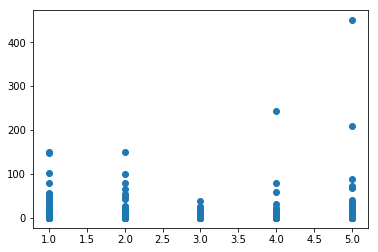

In [149]:
import matplotlib.pyplot as plt
plt.scatter(df_first_10000['star_rating'],df_first_10000['helpful_votes'])

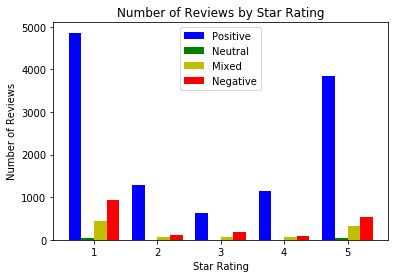

In [150]:
x = df_first_10000['star_rating']

y = df_first_10000[df_first_10000['sentiment'] == 'POSITIVE'].groupby('star_rating').sum()['total_votes']
z = df_first_10000[df_first_10000['sentiment'] == 'NEUTRAL'].groupby('star_rating').sum()['total_votes']
p = df_first_10000[df_first_10000['sentiment'] == 'MIXED'].groupby('star_rating').sum()['total_votes']
k = df_first_10000[df_first_10000['sentiment'] == 'NEGATIVE'].groupby('star_rating').sum()['total_votes']

ax = plt.subplot(111)
p1 = ax.bar(y.index-0.3, y, width=0.2, color='b', align='center')
p2 = ax.bar(z.index-0.1, z, width=0.2, color='g', align='center')
p3 = ax.bar(p.index+0.1, p, width=0.2, color='y', align='center')
p4 = ax.bar(k.index+0.3, k, width=0.2, color='r', align='center')
plt.ylabel('Number of Reviews')
plt.xlabel('Star Rating')
plt.title('Number of Reviews by Star Rating')
plt.legend((p1[0],p2[0],p3[0],p4[0]), ('Positive', 'Neutral','Mixed','Negative'))
plt.show()

In [151]:
df_first_10000.groupby('sentiment').mean()['star_rating']

sentiment
MIXED       4.209032
NEGATIVE    4.199344
NEUTRAL     4.000000
POSITIVE    4.206295
Name: star_rating, dtype: float64

In [152]:
df_first_10000

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,12039526,RTIS3L2M1F5SM,B001CXYMFS,737716809,Thrustmaster T-Flight Hotas X Flight Stick,Video Games,5,0,0,N,Y,an amazing joystick. I especially love that yo...,"Used this for Elite Dangerous on my mac, an am...",2015-08-31,POSITIVE
1,US,9636577,R1ZV7R40OLHKD,B00M920ND6,569686175,Tonsee 6 buttons Wireless Optical Silent Gamin...,Video Games,5,0,0,N,Y,Definitely a silent mouse... Not a single clic...,"Loved it, I didn't even realise it was a gami...",2015-08-31,POSITIVE
2,US,2331478,R3BH071QLH8QMC,B0029CSOD2,98937668,Hidden Mysteries: Titanic Secrets of the Fatef...,Video Games,1,0,1,N,Y,One Star,poor quality work and not as it is advertised.,2015-08-31,NEGATIVE
3,US,52495923,R127K9NTSXA2YH,B00GOOSV98,23143350,GelTabz Performance Thumb Grips - PlayStation ...,Video Games,3,0,0,N,Y,"good, but could be bettee","nice, but tend to slip away from stick in inte...",2015-08-31,MIXED
4,US,14533949,R32ZWUXDJPW27Q,B00Y074JOM,821342511,Zero Suit Samus amiibo - Japan Import (Super S...,Video Games,4,0,0,N,Y,Great but flawed.,"Great amiibo, great for collecting. Quality ma...",2015-08-31,MIXED
5,US,2377552,R3AQQ4YUKJWBA6,B002UBI6W6,328764615,Psyclone Recharge Station for Nintendo Wii 4 P...,Video Games,1,0,0,N,Y,One Star,The remote constantly have to be adjusted in o...,2015-08-31,NEGATIVE
6,US,17521011,R2F0POU5K6F73F,B008XHCLFO,24234603,Protection for your 3DS XL,Video Games,5,0,0,N,Y,A Must,I have a 2012-2013 XL and this is very durable...,2015-08-31,POSITIVE
7,US,19676307,R3VNR804HYSMR6,B00BRA9R6A,682267517,Nerf 3DS XL Armor,Video Games,5,0,0,N,Y,Five Stars,"Perfect, kids loved them. Great protection for...",2015-08-31,POSITIVE
8,US,224068,R3GZTM72WA2QH,B009EPWJLA,435241890,One Piece: Pirate Warriors / Kaizoku Musou PS3...,Video Games,5,0,0,N,Y,Five Stars,Excelent,2015-08-31,POSITIVE
9,US,48467989,RNQOY62705W1K,B0000AV7GB,256572651,Playstation 2 Dance Pad Revolution 2,Video Games,4,0,0,N,Y,Four Stars,Slippery but expected,2015-08-31,POSITIVE


Text(0.5, 1.0, 'Number of Reviews by Star Rating (Positive)')

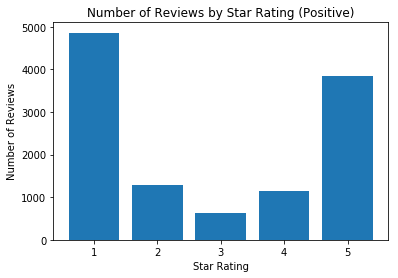

In [153]:
x = df_first_10000[df_first_10000['sentiment'] == 'POSITIVE'].groupby('star_rating').sum()['total_votes']
plt.bar(x.index,x )
plt.ylabel('Number of Reviews')
plt.xlabel('Star Rating')
plt.title('Number of Reviews by Star Rating (Positive)')

Text(0.5, 1.0, 'Number of Reviews by Star Rating (Neutral)')

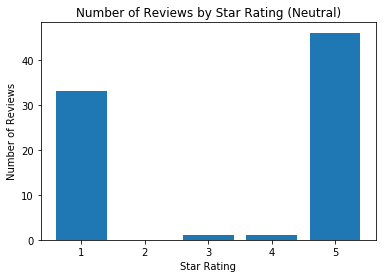

In [154]:
y = df_first_10000[df_first_10000['sentiment'] == 'NEUTRAL'].groupby('star_rating').sum()['total_votes']
plt.bar(y.index,y )
plt.ylabel('Number of Reviews')
plt.xlabel('Star Rating')
plt.title('Number of Reviews by Star Rating (Neutral)')

Text(0.5, 1.0, 'Number of Reviews by Star Rating (Mixed)')

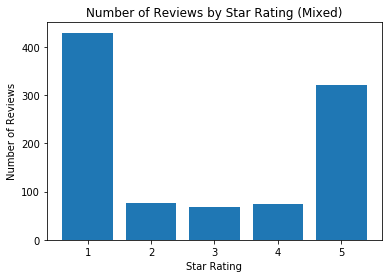

In [155]:
k = df_first_10000[df_first_10000['sentiment'] == 'MIXED'].groupby('star_rating').sum()['total_votes']
plt.bar(k.index,k)
plt.ylabel('Number of Reviews')
plt.xlabel('Star Rating')
plt.title('Number of Reviews by Star Rating (Mixed)')

Text(0.5, 1.0, 'Number of Reviews by Star Rating (Negative)')

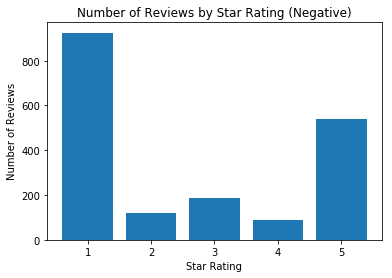

In [156]:
p = df_first_10000[df_first_10000['sentiment'] == 'NEGATIVE'].groupby('star_rating').sum()['total_votes']
plt.bar(p.index,p)
plt.ylabel('Number of Reviews')
plt.xlabel('Star Rating')
plt.title('Number of Reviews by Star Rating (Negative)')

In [159]:
#Lets take a look at some of the contradicting reviews
x = df_first_10000[df_first_10000['star_rating'] == 1]
x = x[x['sentiment']=='POSITIVE']
x.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
26,US,25401563,R1FJWU0IJ4KUT4,B001BNFQKO,108570469,Grand Theft Auto IV,Video Games,1,5,5,N,Y,DRM FAIL,Normally I wouldn't bother rating anythng 1 st...,2015-08-31,POSITIVE
41,US,2305730,R1H4FFUAQGFD3Q,B005DI7N7W,56820144,CirKa Controller for N64 (Red),Video Games,1,0,0,N,Y,One Star,Don't like at all not happy happy just sad sad,2015-08-31,POSITIVE
43,US,1822902,R2FGNUPI80N01F,B000I7GI8I,292434726,Xbox Precision Controller,Video Games,1,0,1,N,Y,One Star,Did not work could not return,2015-08-31,POSITIVE
67,US,13391060,R1SO82U24GB5BZ,B001E65P72,316986472,Generic Battery Pack Cover for Xbox 360 Contro...,Video Games,1,0,0,N,Y,"If ZERO stars were an option, that's what I wo...",This thing did NOT work. It's actually two pie...,2015-08-31,POSITIVE
68,US,20138121,RLM1H6VO69TWL,B00EM5UFF4,246340720,Plants vs. Zombies Garden Warfare,Video Games,1,0,1,N,Y,Complete scam,must buy a monthly subscription to play this g...,2015-08-31,POSITIVE


In [160]:
x = df_first_10000[df_first_10000['star_rating'] == 5]
x = x[x['sentiment']=='NEGATIVE']
x.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
27,US,3014276,R3D8ELWH0671OJ,B00RAB0J0S,103963355,Gameband,Video Games,5,3,7,N,Y,Five Stars,Hi,2015-08-31,NEGATIVE
30,US,45205407,R3GXKE92MJBBSL,B00KVP78FE,177244653,Sony PlayStation 4 PS4 Dualshock 4 Wireless Co...,Video Games,5,0,0,N,Y,Five Stars,Nice... just like the oem one,2015-08-31,NEGATIVE
39,US,30067162,R1OTFNID62KK2T,B004UDLRMS,271964156,Resident Evil: Operation Raccoon City,Video Games,5,0,1,N,Y,Five Stars,great,2015-08-31,NEGATIVE
45,US,29604302,R9WP6WZ1ANYSD,B00O9GW8VK,949822044,Nintendo Super Smash Bros. Black Classic Gamec...,Video Games,5,0,0,N,Y,Look no further,a lot more comfortable and responsive than any...,2015-08-31,NEGATIVE
61,US,25204329,R27PVWUICA5L2T,B010B6EKVC,375499210,Nintendo Amiibo,Video Games,5,0,0,N,Y,Awesome addition to collection,Love it!,2015-08-31,NEGATIVE


In [174]:
#lastly, let's look at some mixed reviews
x = df_first_10000[df_first_10000['star_rating'] == 1 ]
x = x[x['sentiment']=='MIXED']
x.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
354,US,43353677,R3H42LXPSL7FFT,B002EECSZ0,282702707,Wii Active Workout Kit,Video Games,1,0,0,N,Y,Disappointed!,I give this product 1 star because I'm unable ...,2015-08-31,MIXED
379,US,165189,R96EIAEYEQCBP,B00066LGEM,182730873,PlayStation 2 Multitap,Video Games,1,0,0,N,Y,DOA,"It looked almost new, however didn't even work...",2015-08-31,MIXED
529,US,2571621,R3NG7URWSAVDBV,B00CXCCH1I,737158163,UFC,Video Games,1,0,2,N,Y,I do not recommend!,I got broken the game! I do not recommend!,2015-08-31,MIXED
578,US,1605701,R1KK5N6XWIPHIQ,B00D3RBZHY,569678758,Need for Speed Rivals,Video Games,1,0,1,N,Y,The game would not download to my PS4 I tried ...,The game would not download to my PS4 I tried ...,2015-08-31,MIXED
787,US,351805,R2SVYUHSDEC809,B005EQE0YM,911564750,Turtle Beach Ear Force X12 Arctic Amplified St...,Video Games,1,0,1,N,Y,One Star,it broke on the 3rd week and i dont even play ...,2015-08-31,MIXED


In [175]:
x = df_first_10000[df_first_10000['star_rating'] == 5 ]
x = x[x['sentiment']=='MIXED']
x.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
28,US,27975200,R3IU97WRKS5SLN,B0034JKYO6,718871603,Halo Wars,Video Games,5,0,0,N,Y,Five Stars,"great game, halo RTS well done",2015-08-31,MIXED
29,US,47864127,RJOF64DZUKQ3D,B006OI3CTS,578887204,Kingdom Hearts 3D Dream Drop Distance,Video Games,5,0,0,N,Y,Five Stars,Was a gift and is loved and used by granddaugh...,2015-08-31,MIXED
54,US,40033984,R2GUL5113VW0DR,B0050SYS5A,366017508,Zoom for Kinect - Xbox 360,Video Games,5,0,2,N,Y,Five Stars,Ordered this for my cousin,2015-08-31,MIXED
78,US,1882059,R1UON5PEH3RQ6I,B007UM599S,138105026,Lost Planet 3,Video Games,5,0,0,N,Y,Five Stars,Game is awesome,2015-08-31,MIXED
79,US,10712640,R26W1B09I4OAXL,B00C1IHB92,484830671,Muramasa Rebirth with Pre order bonus,Video Games,5,0,0,N,Y,Five Stars,A good game and the special edition has a lot ...,2015-08-31,MIXED


#As we can see, while accurate for the most part Amazon Comprehend still has ways to go in terms of getting the accuracy down
